In [211]:
import pandas as pd
import numpy as np
import os
from similarity.normalized_levenshtein import NormalizedLevenshtein
import matplotlib.pyplot as plt
%matplotlib inline

In [312]:
base = pd.read_csv("/mnt/EC86AD3086ACFC68/cnc/cars/output/csvs/r_NVR_ch8_main_20190701120000_20190701140002.csv")

In [313]:
base.plate = base.plate.replace(np.nan,"")

In [314]:
frames = base["frame_number"].to_numpy()
frames

array([  536,   537,   538, ..., 72054, 72055, 72056])

In [315]:
areas = base["yolo_rect_area"].to_numpy()
areas

array([ 74115,  77688,  80069, ..., 112128, 114642, 118170])

In [316]:
plates = base["plate"].to_numpy()
plates

array(['', '', '', ..., '', '', ''], dtype=object)

In [317]:
frame_thresh = 30
frames_counter = 0
for ii in range (len(frames)):
    if frames[ii] - frames[ii-1] > frame_thresh:
        frames_counter += 1

print(str(frames_counter)+" were counter using frame distance.")

290 were counter using frame distance.


In [318]:
normalized_levenshtein = NormalizedLevenshtein()
lev_thresh = 0.5
u_plates = np.unique(plates)
u_plates = np.delete(u_plates, 0)
plates_counter = 0
init_plate = "AAA000"
for plate in u_plates:
    if normalized_levenshtein.distance(init_plate, plate) >= lev_thresh:
        plates_counter += 1
        init_plate = plate

print(str(plates_counter)+" were counted using plate difference.")

1491 were counted using plate difference.


In [319]:
base.columns

Index(['Unnamed: 0', 'frame_number', 'yolo_rect_area', 'vehicle_type', 'plate',
       'plate_confidence'],
      dtype='object')

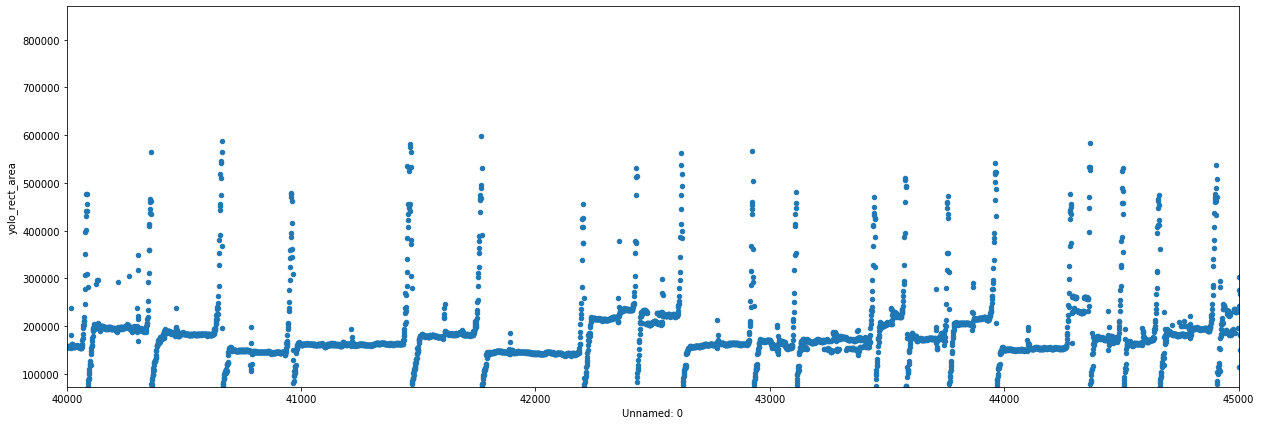

In [335]:
base.plot(x="Unnamed: 0", y="yolo_rect_area", kind="scatter", figsize=(21,7), xlim=(40000,45000), ylim=(73000, 870000))

In [321]:
print(min(areas))
print(max(areas))

73745
867330


In [322]:
p = 0
detections_ranges = []
for ii in range(len(areas[p:])-15):
    if areas[ii+p] >= 430000:
        maxarea = areas[ii+p]
        maxarea_index = ii+p
        
        for jj in range(15):
            if areas[ii+jj+p] > maxarea:
                maxarea = areas[ii+jj+p]
                maxarea_index = ii+jj+p
        ii = maxarea_index
        
        detections_ranges.append((maxarea_index-70,maxarea_index))

detections_ranges = []
ii = 0
while ii < 3000:
    if areas[ii] >= 400000:
        maxarea = areas[ii]
        maxarea_index = ii
        
        for jj in range(15):
            if areas[ii+jj] > maxarea:
                maxarea = areas[ii+jj]
                maxarea_index = ii+jj
        ii = maxarea_index
        detections_ranges.append((maxarea_index-50,maxarea_index-20))
    ii+=1
        

In [323]:
final_detections_ranges = []
for ii in range(len(detections_ranges)-1):
    if (detections_ranges[ii+1][1]-detections_ranges[ii][1])<=55:
        pass
    else:
        final_detections_ranges.append(detections_ranges[ii])

In [329]:
len(final_detections_ranges)

512